<a href="https://colab.research.google.com/github/nutapol97/Python-for-DS-AI_Nutapol_T./blob/main/Task_01_Supervised_Learning_Classification_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, classification_report
from sklearn.preprocessing import label_binarize
def train_test(X,Y,size):
  from numpy.random import default_rng
  rng = default_rng()
  SizeTrain=int((size*X.shape[0]))
  random_np=rng.choice(X.shape[0], size=SizeTrain, replace=False)
  X_test=X[random_np,:]
  y_test=Y[random_np,]
  Y_train=np.delete(Y, random_np,axis=0)
  X_train=np.delete(X, random_np,axis=0)
  Y_train=Y_train.reshape(Y_train.shape[0],)
  y_test=y_test.reshape(y_test.shape[0],)
  return X_train,X_test,Y_train,y_test

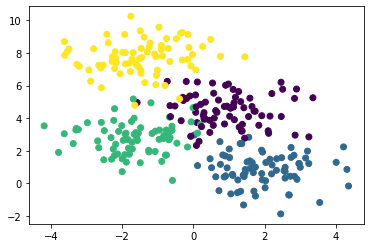

In [2]:
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0],X[:,1],c=y)

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test(X, y, size=0.3)

In [4]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def find_distance(self,X_train, X_test):
      dist = X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :]
      sq_dist = dist ** 2
      summed_dist = sq_dist.sum(axis=2)
      sq_dist = np.sqrt(summed_dist)
      return sq_dist
    def ind_neighbors(self,X_train, X_test):
      dist = find_distance(X_train, X_test)
      neighbors_ix = np.argsort(dist)[:, 0:self.k]
      return neighbors_ix
    def find_neighbors(self,X_train, X_test):
      dist = find_distance(X_train, X_test)
      neighbors_ix = np.argsort(dist)[:, 0:self.k]
      return neighbors_ix
    def find_neighbors_withoutK(self,X_train, X_test):
      dist = self.find_distance(X_train, X_test)
      #return the first k neighbors
      neighbors_ix = np.argsort(dist)
      return neighbors_ix
    def get_most_common(self,y,n_class,X_train,X_test):
      y_nearest = y[0:self.k]
      bincount = np.bincount(y_nearest, minlength=n_class)
      largest = bincount.argmax()
      second_largest = bincount.argsort()[-2:][0]
      if bincount[largest] == bincount[second_largest]:
          y_nearest = y[0: self.k+1]
          return np.bincount(y_nearest).argmax(), bincount[largest] / bincount.sum()
      return np.bincount(y_nearest).argmax(), bincount[largest] / bincount.sum()

    def cv(self, X_train, y_train, cv, k):
        foldsize = int(X_train.shape[0]/cv)
        yhat_cv = np.zeros((len(k), cv))
        yhat_cv_prob = np.zeros((len(k), cv))
        
        for k_idx, kneighbors in enumerate(k):
            self.k = kneighbors
            for fold_idx, i in enumerate(range(0, X_train.shape[0], foldsize)):
                X_test_ = X_train[i:i+foldsize]
                y_test_ = y_train[i:i+foldsize]
                X_train_ = np.concatenate((X_train[:i], X_train[i+foldsize:]))
                y_train_ = np.concatenate((y_train[:i], y_train[i+foldsize:]))
                yhat, yhat_prob = self.predict(X_train_, X_test_, y_train_)
                accuracy = np.sum(yhat == y_test_)/len(y_test_)
                yhat_cv[k_idx, fold_idx] = accuracy
                yhat_cv_prob[k_idx, fold_idx] = yhat_prob.mean()
        return yhat_cv, yhat_cv_prob
        
    def predict(self, X_train, X_test, y_train):
          n_classes = len(np.unique(y_train))
          neighbors_ix = self.find_neighbors_withoutK(X_train, X_test)
          yhat = np.zeros(X_test.shape[0])
          yhat_prob = np.zeros(X_test.shape[0])
          for ix, y in enumerate(y_train[neighbors_ix]):
              yhat[ix], yhat_prob[ix] = self.get_most_common(y,n_classes, X_train, X_test)
          return yhat, yhat_prob

    def report_KNN(self,y_test,yhat,yhat_prob):
          from sklearn.metrics import classification_report
          print("=========Accuracy=======")
          print("Accuracy: ", np.sum(yhat == y_test)/len(y_test))
          print("=========Classification report=======")
          print("Report: ", classification_report(y_test, yhat))
          print("=========Probability score=======")
          print("Probability: ", yhat_prob.mean())


In [5]:
model = KNN()

#check cv
k = np.arange(2, 11)
cv_score, prob_score = model.cv(X_train, y_train, 10, k)
cv_score = cv_score.mean(axis=1)
prob_score = prob_score.mean(axis=1)

for k_idx, kneighbors in enumerate(k):
    print(f"Score with k={kneighbors}: ", cv_score[k_idx], "and prob_score of ", prob_score[k_idx])

#choose model with highest score
model = KNN(k=2)
yhat, yhat_prob = model.predict(X_train, X_test, y_train)
model.report_KNN(y_test,yhat,yhat_prob)




Score with k=2:  0.9238095238095239 and prob_score of  0.9452380952380952
Score with k=3:  0.9285714285714286 and prob_score of  0.9349206349206348
Score with k=4:  0.9333333333333333 and prob_score of  0.9357142857142857
Score with k=5:  0.9333333333333333 and prob_score of  0.9314285714285715
Score with k=6:  0.9333333333333333 and prob_score of  0.9301587301587302
Score with k=7:  0.9333333333333333 and prob_score of  0.9258503401360544
Score with k=8:  0.9238095238095239 and prob_score of  0.9226190476190477
Score with k=9:  0.9285714285714286 and prob_score of  0.9185185185185185
Score with k=10:  0.9285714285714286 and prob_score of  0.9152380952380952
=========Accuracy=======
Accuracy:  0.9444444444444444
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.95      0.91      0.93        22
           2       1.00      0.95      0.98        22
           3  